<a href="https://colab.research.google.com/github/Harshasai454/Image-Classification/blob/main/MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import  imread
from skimage.transform import resize

target = []
images = []
flat_data =[]

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['bikes','cars','ships']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i)
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    target.append(class_num)


In [2]:
x = flat_data
y = target

In [3]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=100)


In [4]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([19, 21, 23]))

In [5]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([12,  9,  7]))

In [6]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,1,10,100]
}
cv = GridSearchCV(svc,parameters,cv =5)
cv.fit(x_train,y_train)
cv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [7]:
from sklearn.svm import SVC 
model = SVC(C=1)
model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
y_pred = cv.predict(x_test)
y_pred

array([1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0,
       0, 0, 2, 1, 0, 2])

In [9]:
y_test

[1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1]

In [10]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[9, 0, 0],
       [2, 7, 1],
       [1, 2, 6]])

In [11]:
accuracy_score(y_pred,y_test)

0.7857142857142857

In [12]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.78      0.70      0.74        10
           2       0.86      0.67      0.75         9

    accuracy                           0.79        28
   macro avg       0.79      0.79      0.78        28
weighted avg       0.79      0.79      0.78        28



In [13]:
import pickle
pickle.dump(cv,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://www.royalsundaram.in/html/files/motor101/two-wheeler/Honda-Bike.jpg
(280, 430, 3)
 PREDICTED OUTPUT: bikes


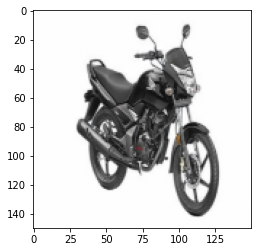

In [14]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/5/5c/John_C._Munro_off_Hong_Kong.jpg
(501, 696, 3)
 PREDICTED OUTPUT: ships


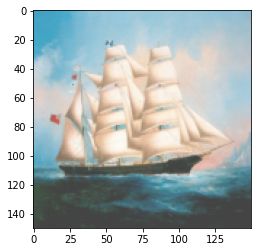

In [15]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')